In [99]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [100]:
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA (2).csv


In [101]:
tesla = pd.read_csv(io.BytesIO(uploaded['TSLA.csv']))
tesla.set_index('Date', inplace = True)
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800


In [102]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2021-09-29 to 2022-09-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8+ KB


In [103]:
print(tesla.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [104]:
from google.colab import files
uploaded = files.upload()

Saving GM.csv to GM (2).csv


In [105]:

gm = pd.read_csv(io.BytesIO(uploaded['GM.csv']))
gm.set_index('Date', inplace = True)
gm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-29,53.299999,53.360001,52.529999,52.930000,52.809429,10881100
2021-09-30,52.930000,53.200001,52.180000,52.709999,52.589931,16324300
2021-10-01,53.029999,53.380001,52.250000,53.130001,53.008976,16660400
2021-10-04,54.900002,55.639999,53.680000,53.980000,53.857037,29206700
2021-10-05,54.189999,54.740002,53.650002,54.340000,54.216217,18201500


In [106]:
gm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 2021-09-29 to 2022-09-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8+ KB


In [107]:
print(gm.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [108]:
from google.colab import files
uploaded = files.upload()

Saving F.csv to F (2).csv


In [109]:
f = pd.read_csv(io.BytesIO(uploaded['F.csv']))
f.set_index('Date', inplace = True)
f.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-29,14.46,14.50,14.17,14.30,13.923157,56805500
2021-09-30,14.26,14.32,14.09,14.16,13.786846,78820500
2021-10-01,14.26,14.37,14.01,14.16,13.786846,51880900
2021-10-04,14.27,14.79,14.22,14.35,13.971840,78332500
2021-10-05,14.44,14.44,14.11,14.29,13.913420,55915800


In [110]:
f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 2021-09-29 to 2022-09-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8+ KB


In [111]:
print(f.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


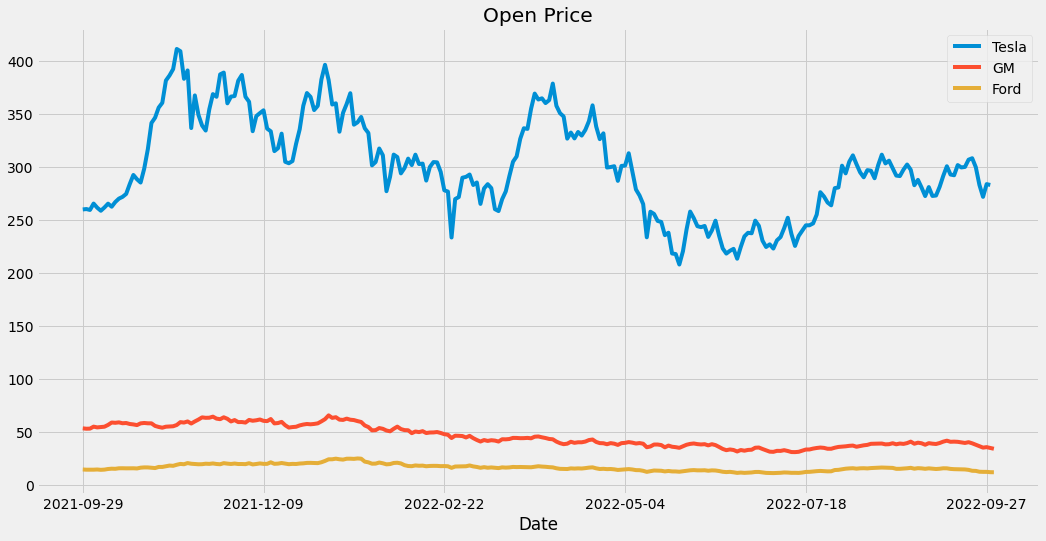

In [112]:
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
gm['Open'].plot(label='GM')
f['Open'].plot(label='Ford')
plt.legend()
plt.show()

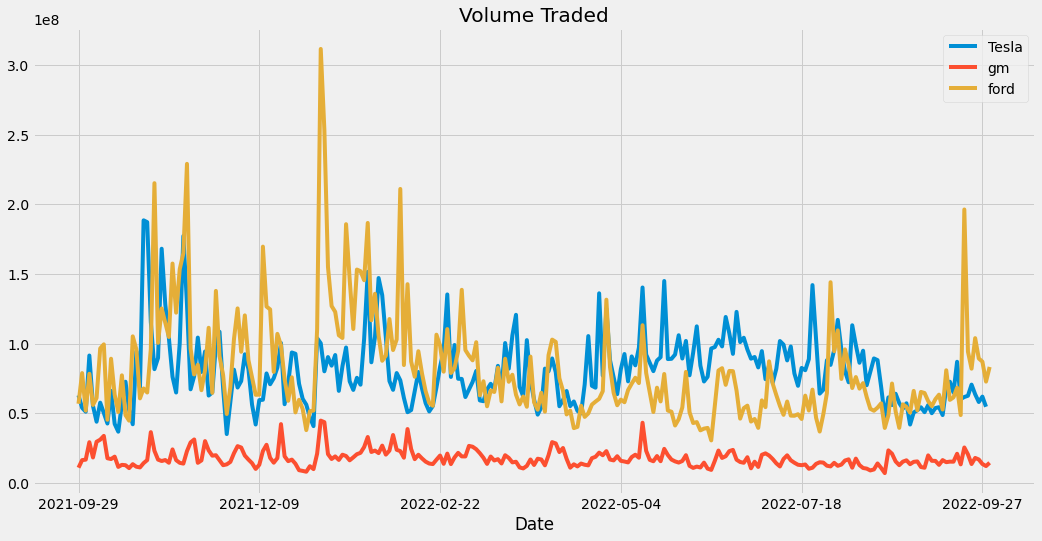

In [113]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='gm')
f['Volume'].plot(label='ford')
plt.legend()
plt.show()

We can see that ford has a big spike in late 2021 so we can use argmax to find the index of the max value.

In [114]:
f['Volume'].argmax()


67

In [115]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
f['Total Traded'] = f['Open']*f['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

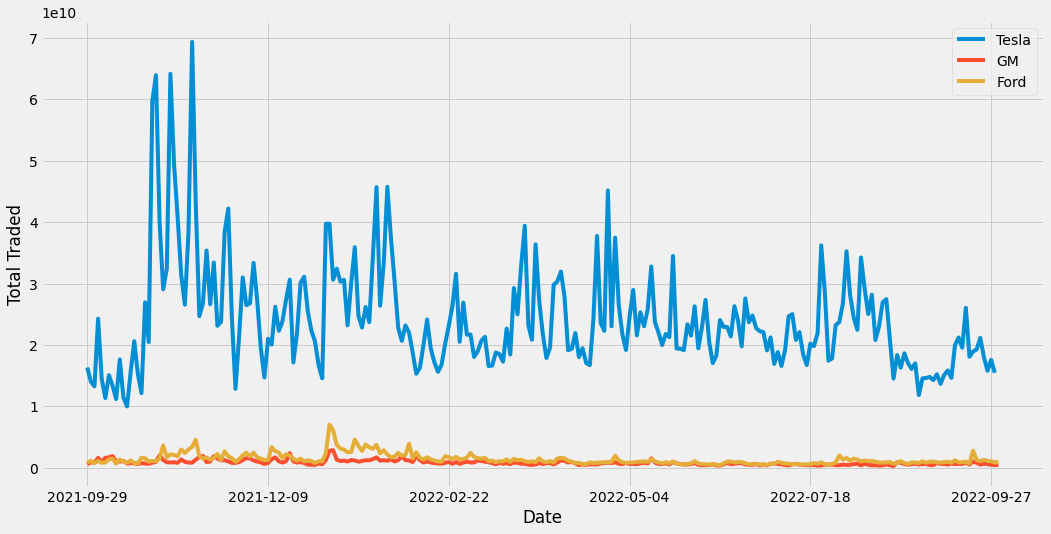

In [116]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
f['Total Traded'].plot(label='Ford')
plt.legend()
plt.ylabel('Total Traded')
plt.show()

There was huge amount of money traded for tesla in last 2021.

In [117]:
tesla['Total Traded'].argmax()


29

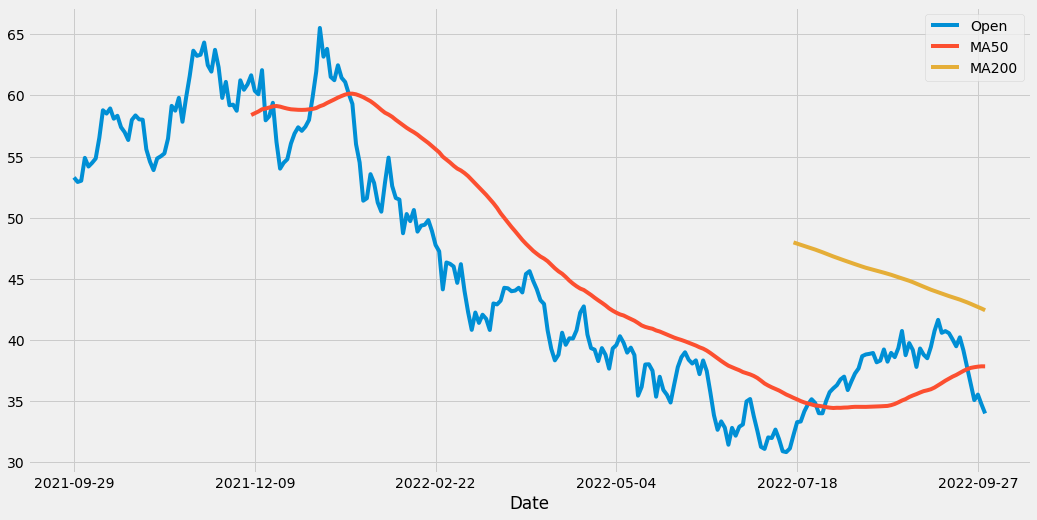

In [118]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(label='gm',figsize=(16,8));

In [119]:
car = pd.concat([tesla['Open'],gm['Open'],f['Open']],axis=1)


In [120]:
car.columns = ['Tesla Open','GM Open','Ford Open']


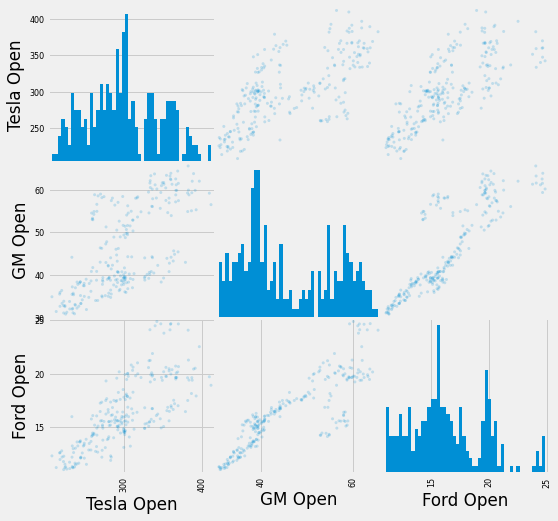

In [121]:
scatter_matrix(car,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});


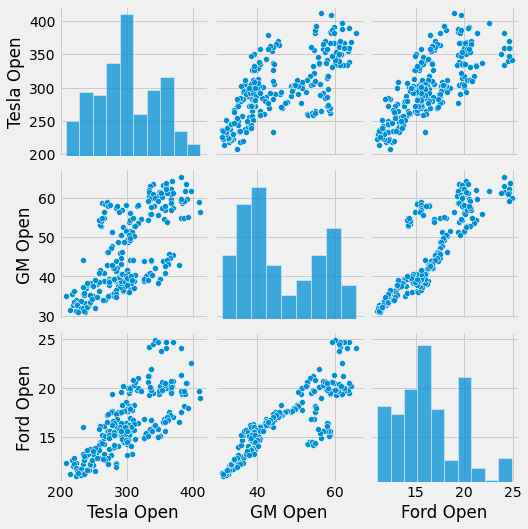

In [122]:
sns.pairplot(car.dropna())

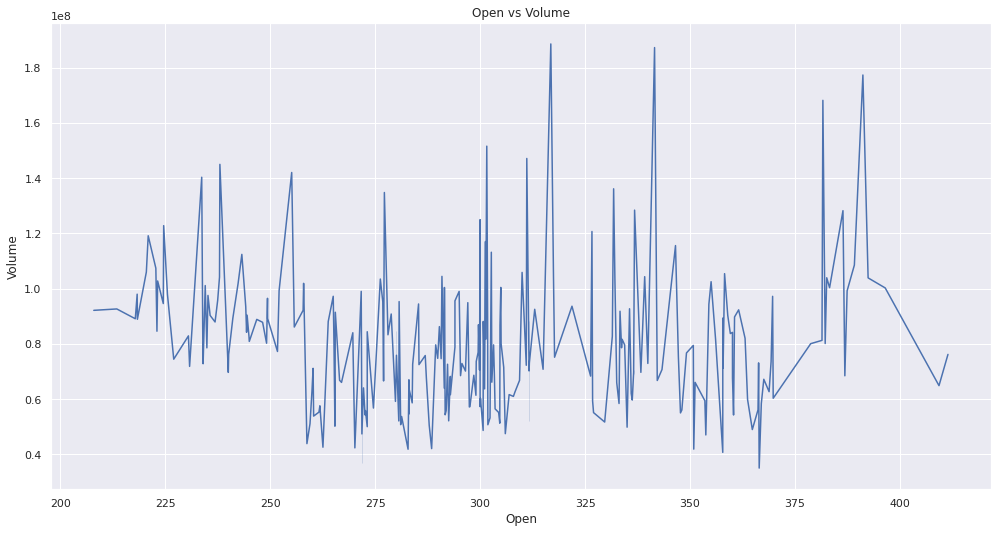

In [155]:
sns.lineplot(x="Open", y="Volume", data=tesla )
plt.title('Open vs Volume')
sns.set(rc = {'figure.figsize':(20,8)})
plt.show()

this just informs you of your percent gain or loss if you bought the stock on day and then sold it the next day.

In [124]:
tesla['returns'] = tesla['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)
f['returns'] = f['Close'].pct_change(1)



In [125]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,returns
Date,,,,,,,,
2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700,1.633127e+10,NaN
2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,1.402364e+10,-0.007462
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,1.325724e+10,-0.000335
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,2.427995e+10,0.008140
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,1.446590e+10,-0.001203


In [126]:
gm.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2021-09-29,53.299999,53.360001,52.529999,52.930000,52.809429,10881100,5.799626e+08,NaN,NaN,NaN
2021-09-30,52.930000,53.200001,52.180000,52.709999,52.589931,16324300,8.640452e+08,NaN,NaN,-0.004156
2021-10-01,53.029999,53.380001,52.250000,53.130001,53.008976,16660400,8.835010e+08,NaN,NaN,0.007968
2021-10-04,54.900002,55.639999,53.680000,53.980000,53.857037,29206700,1.603448e+09,NaN,NaN,0.015998
2021-10-05,54.189999,54.740002,53.650002,54.340000,54.216217,18201500,9.863393e+08,NaN,NaN,0.006669


In [127]:
f.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,returns
Date,,,,,,,,
2021-09-29,14.46,14.50,14.17,14.30,13.923157,56805500,8.214075e+08,NaN
2021-09-30,14.26,14.32,14.09,14.16,13.786846,78820500,1.123980e+09,-0.009790
2021-10-01,14.26,14.37,14.01,14.16,13.786846,51880900,7.398216e+08,0.000000
2021-10-04,14.27,14.79,14.22,14.35,13.971840,78332500,1.117805e+09,0.013418
2021-10-05,14.44,14.44,14.11,14.29,13.913420,55915800,8.074242e+08,-0.004181


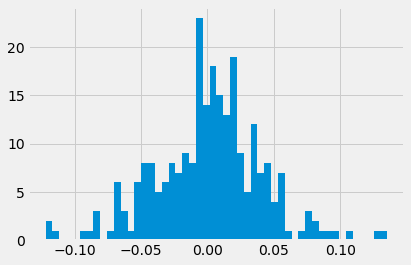

In [128]:
tesla['returns'].hist(bins=50)


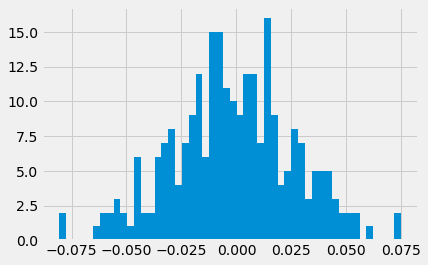

In [129]:
gm['returns'].hist(bins=50)


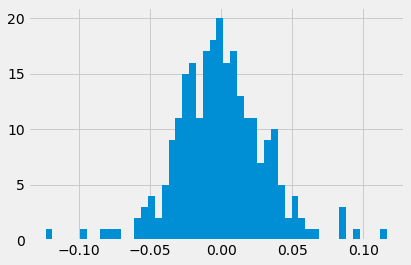

In [130]:
f['returns'].hist(bins=50)


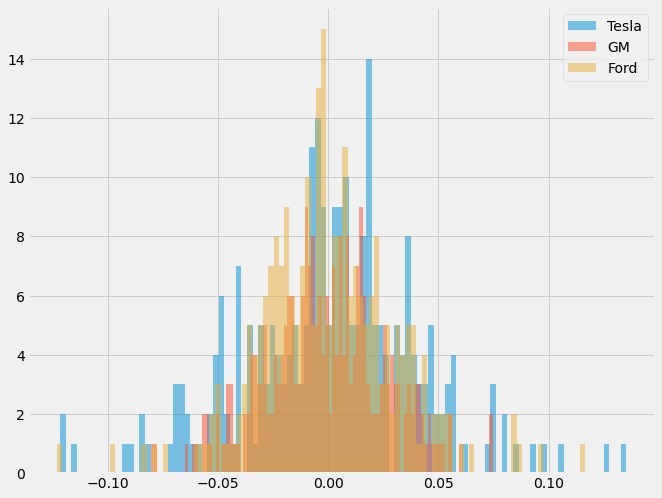

In [131]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
f['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

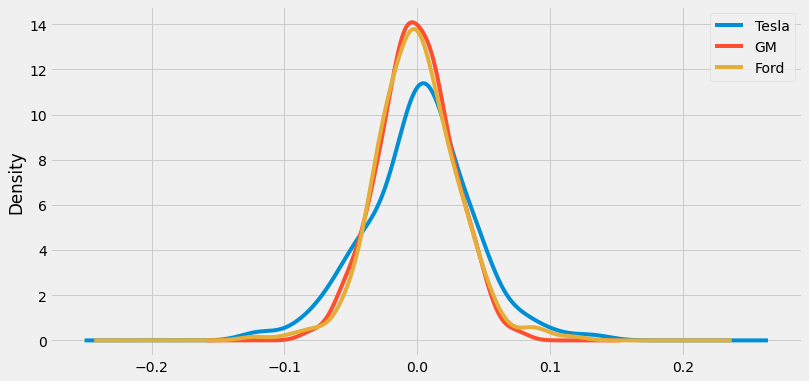

In [132]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
gm['returns'].plot(kind='kde',label='GM')
f['returns'].plot(kind='kde',label='Ford')
plt.legend()

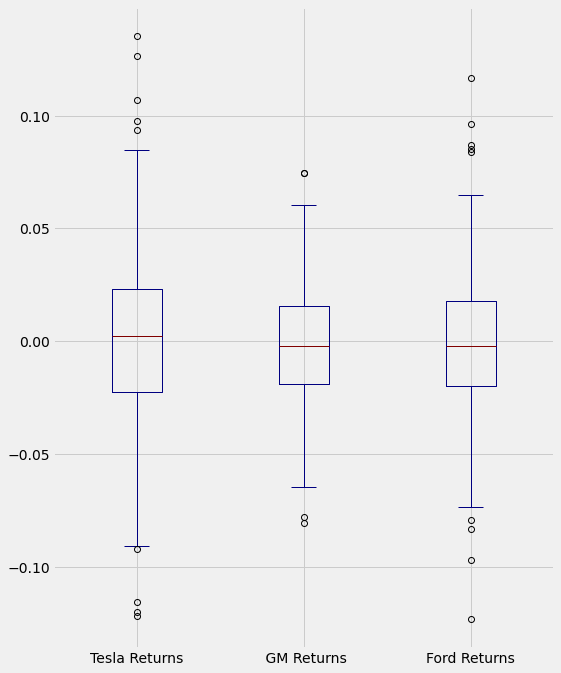

In [133]:
box = pd.concat([tesla['returns'],gm['returns'],f['returns']],axis=1)
box.columns = ['Tesla Returns',' GM Returns','Ford Returns']
box.plot(kind='box',figsize=(8,11),colormap='jet')

to compare daily returns between stocks

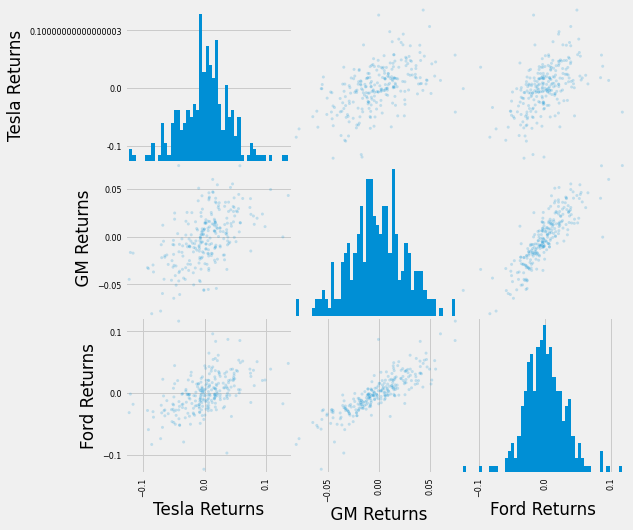

In [134]:
scatter_matrix(box,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});


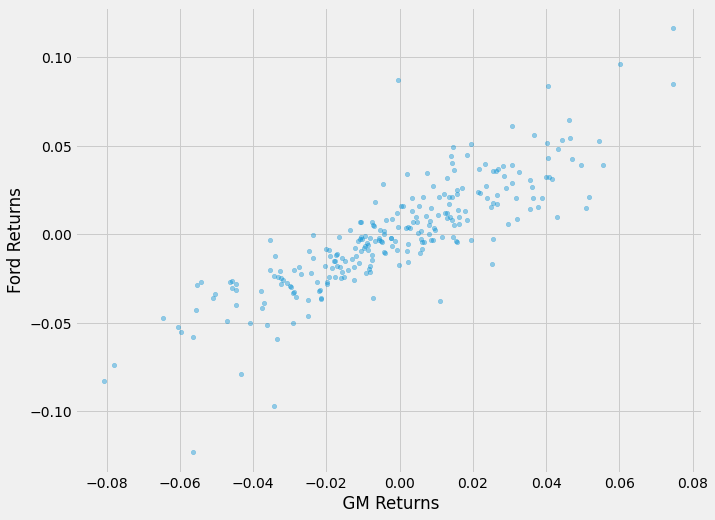

In [135]:
box.plot(kind='scatter',x=' GM Returns',y='Ford Returns',alpha=0.4,figsize=(10,8))


In [136]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
f['Cumulative Return'] = (1 + f['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()



In [137]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700,1.633127e+10,NaN,NaN
2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,1.402364e+10,-0.007462,0.992538
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,1.325724e+10,-0.000335,0.992205
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,2.427995e+10,0.008140,1.000282
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,1.446590e+10,-0.001203,0.999078


In [138]:
f.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2021-09-29,14.46,14.50,14.17,14.30,13.923157,56805500,8.214075e+08,NaN,NaN
2021-09-30,14.26,14.32,14.09,14.16,13.786846,78820500,1.123980e+09,-0.009790,0.990210
2021-10-01,14.26,14.37,14.01,14.16,13.786846,51880900,7.398216e+08,0.000000,0.990210
2021-10-04,14.27,14.79,14.22,14.35,13.971840,78332500,1.117805e+09,0.013418,1.003497
2021-10-05,14.44,14.44,14.11,14.29,13.913420,55915800,8.074242e+08,-0.004181,0.999301


In [139]:
gm.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2021-09-29,53.299999,53.360001,52.529999,52.930000,52.809429,10881100,5.799626e+08,NaN,NaN,NaN,NaN
2021-09-30,52.930000,53.200001,52.180000,52.709999,52.589931,16324300,8.640452e+08,NaN,NaN,-0.004156,0.995844
2021-10-01,53.029999,53.380001,52.250000,53.130001,53.008976,16660400,8.835010e+08,NaN,NaN,0.007968,1.003779
2021-10-04,54.900002,55.639999,53.680000,53.980000,53.857037,29206700,1.603448e+09,NaN,NaN,0.015998,1.019838
2021-10-05,54.189999,54.740002,53.650002,54.340000,54.216217,18201500,9.863393e+08,NaN,NaN,0.006669,1.026639


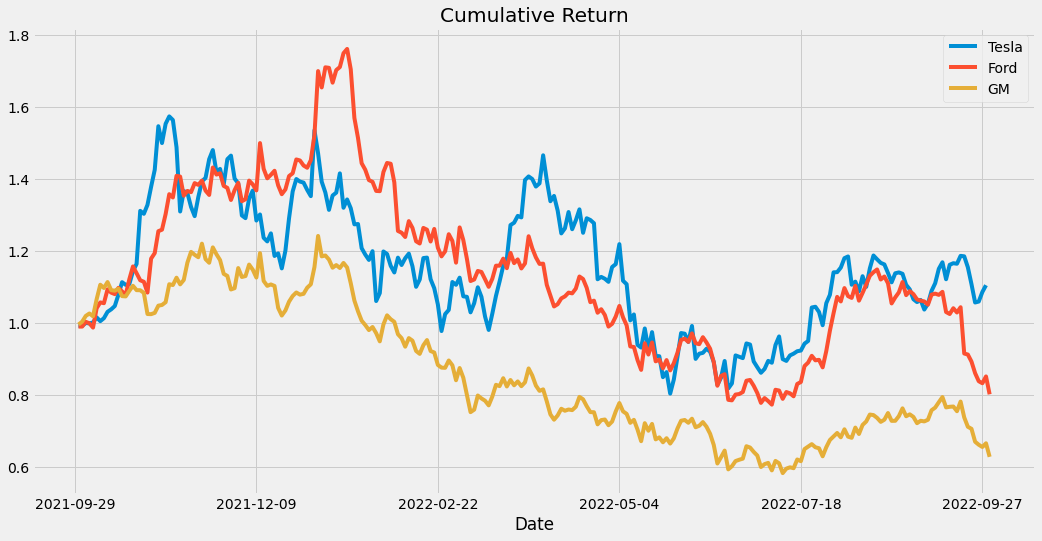

In [140]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
f['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()

tesla and ford gave the highest returns in different times compared to gm

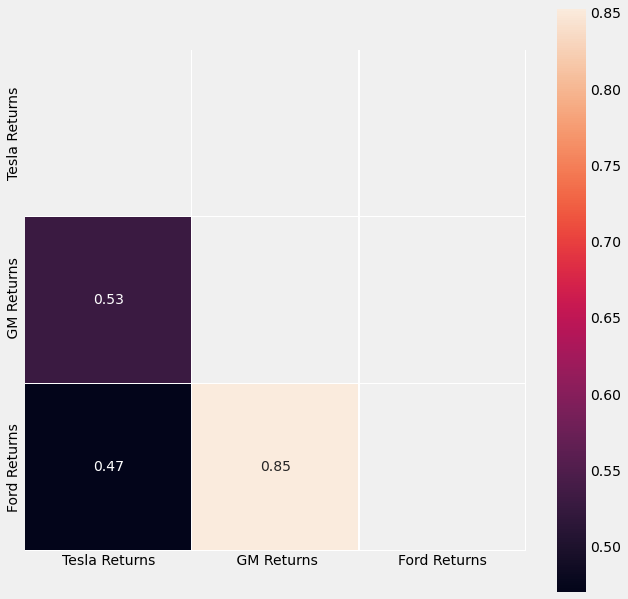

In [141]:
corr = box.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,  square=True, linewidths=.5, annot=True)
plt.show()

In [142]:
def draw_jointplot(data):
    grid = sns.PairGrid(data.dropna())
    grid.map_diag(sns.histplot, bins=40, kde=True)
    grid.map_lower(sns.regplot)
    grid.map_upper(sns.kdeplot)

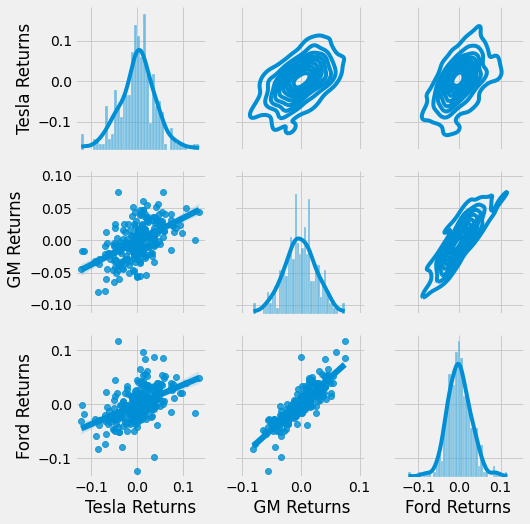

In [143]:
draw_jointplot(box)